In [ ]:
# Example 10: Characterising the reaction time of the subject in a session

#In this example we show how to

#1. Load in trials data for a particular session
#2. Compute the reaction time for each trial in the session
#3. Compute whether there are differences in reaction time depending on trial type (left vs right stimulus, correct vs incorrect trial)
#4. Plot the reaction time across the duration of the session

In [1]:
# 1. Load in trials data
from brainbox.io.one import SessionLoader
from one.api import ONE
import numpy as np

one = ONE()

eid='288bfbf3-3700-4abe-b6e4-130b5c541e61'
pid='05ec6af9-6c83-422d-91a3-ba815fa65e92'

sl = SessionLoader(eid=eid, one=one)
sl.load_trials()

In [2]:
# 2. Compute reaction time
# Define reaction time as the time when the visual stimulus first appears and detected response time
reaction_time = sl.trials['response_times'] - sl.trials['stimOn_times']

In [3]:
# 3. Evaluate reaction time across different trial types
# Compare reaction time for left vs right trials with stimulus contrast > 0%
left_trial_idx = np.bitwise_and(sl.trials['contrastLeft'] > 0, ~np.isnan(sl.trials['contrastLeft']))
right_trial_idx = np.bitwise_and(sl.trials['contrastRight'] > 0, ~np.isnan(sl.trials['contrastRight']))
left_reaction_time = np.mean(reaction_time[left_trial_idx])
right_reaction_time = np.mean(reaction_time[right_trial_idx])
print(f'Average reaction time for stimulus on')
print(f'Left: {left_reaction_time}')
print(f'Right: {right_reaction_time}')

# Compare reaction time for correct vs incorrect trials
correct_trial_idx = sl.trials['feedbackType'] == 1
incorrect_trial_idx = sl.trials['feedbackType'] == -1
correct_reaction_time = np.mean(reaction_time[correct_trial_idx])
incorrect_reaction_time = np.mean(reaction_time[incorrect_trial_idx])
print(f'\nAverage reaction time for trials that were')
print(f'Correct: {correct_reaction_time}')
print(f'Incorrect: {incorrect_reaction_time}')

Average reaction time for stimulus on
Left: 0.8194185790083692
Right: 2.7877781503745043

Average reaction time for trials that were
Correct: 1.66256016572647
Incorrect: 2.70831054907159


Text(0, 0.5, 'Reaction time (s)')

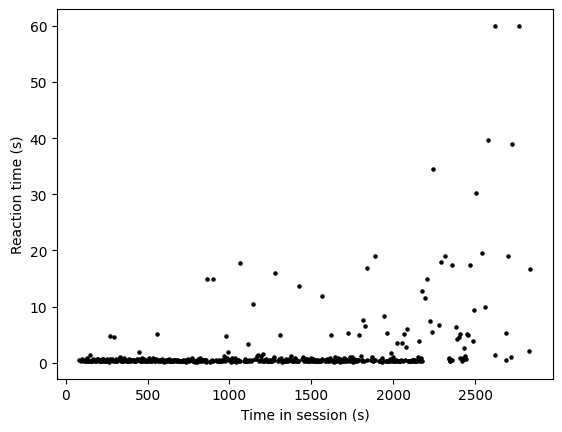

In [4]:
# 4. Make plot of reaction time across session
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(sl.trials['stimOn_times'], reaction_time, c='k', s=5)
ax.set_xlabel('Time in session (s)')
ax.set_ylabel('Reaction time (s)')